In [ ]:
# Portfolio Update 2: Tidy Data Project  
# Jack Thomas 
# 3/17/25

In [522]:
# required libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [523]:
# importing the data 
#mutant_df = pd.read_csv("/Users/jackthomas/Library/CloudStorage/OneDrive-nd.edu/2025Spring/3.MDSC20009/THOMAS-Data-Science-Portfolio/portfolio_projects/TidyData-project/Data/mutant_moneyball.csv")
mutant_df = pd.read_csv("Data/mutant_moneyball.csv")
mutant_df


,Member,TotalValue60s_heritage,TotalValue70s_heritage,TotalValue80s_heritage,TotalValue90s_heritage,TotalValue60s_ebay,TotalValue70s_ebay,TotalValue80s_ebay,TotalValue90s_ebay,TotalValue60s_wiz,TotalValue70s_wiz,TotalValue80s_wiz,TotalValue90s_wiz,TotalValue60s_oStreet,TotalValue70s_oStreet,TotalValue80s_oStreet,TotalValue90s_oStreet
0,warrenWorthington,929056.0,154585.0,23957.0,960.0,23335.0,3362.0,583.0,97.0,"$7,913.00","$1,105.00",$226.00,$65.75,"$68,160.00","$7,360.00",$975.00,$123.00
1,hankMcCoy,929776.0,20705.0,6631.0,881.0,23377.0,1224.0,289.0,82.0,"$7,953.00",$851.00,$89.00,$38.50,"$68,390.00","$5,260.00",$431.00,$81.00
2,scottSummers,933616.0,188635.0,29240.0,739.0,23420.0,5431.0,1031.0,82.0,"$7,993.00","$1,979.00",$438.00,$39.25,"$68,590.00","$11,675.00","$1,427.00",$74.00
3,bobbyDrake,929776.0,154585.0,1514.0,874.0,23377.0,3362.0,70.0,93.0,"$7,953.00","$1,105.00",$48.00,$62.00,"$68,390.00","$7,360.00",$137.00,$108.00
4,jeanGrey,933616.0,179899.0,16868.0,1708.0,23420.0,4903.0,665.0,170.0,"$7,993.00","$1,679.00",$165.00,$108.00,"$68,590.00","$10,265.00",$822.00,$189.00
5,alexSummers,34519.0,144946.0,9352.0,197.0,745.0,2703.0,581.0,21.0,$342.00,$597.00,$253.00,$19.00,"$1,850.00","$3,865.00",$502.00,$24.00
6,lornaDane,76279.0,144946.0,6602.0,731.0,1212.0,2703.0,405.0,41.0,$374.00,$597.00,$116.00,$43.00,"$2,000.00","$3,865.00",$293.00,$44.00
7,ororoMunroe,NaN,171050.0,54205.0,2183.0,NaN,4349.0,1730.0,334.0,NaN,"$1,224.00",$931.00,$158.00,NaN,"$6,890.00","$2,391.00",$273.00
8,kurtWagner,NaN,171050.0,50666.0,NaN,NaN,4349.0,1345.0,NaN,NaN,"$1,224.00",$736.00,NaN,NaN,"$6,890.00","$2,044.00",NaN
9,loganHowlett,NaN,171050.0,52524.0,1079.0,NaN,4349.0,1669.0,100.0,NaN,"$1,224.00",$908.00,$111.00,NaN,"$6,890.00","$2,310.00",$119.00


In [524]:
#summarizing data 
print(mutant_df.shape)
print(mutant_df['Member'].nunique())#each observation is its own character 
print(mutant_df.columns)
print(mutant_df.dtypes)
print(mutant_df.isna().sum())

(26, 17)
26
Index(['Member', 'TotalValue60s_heritage', 'TotalValue70s_heritage',
       'TotalValue80s_heritage', 'TotalValue90s_heritage',
       'TotalValue60s_ebay', 'TotalValue70s_ebay', 'TotalValue80s_ebay',
       'TotalValue90s_ebay', 'TotalValue60s_wiz', 'TotalValue70s_wiz',
       'TotalValue80s_wiz', 'TotalValue90s_wiz', 'TotalValue60s_oStreet',
       'TotalValue70s_oStreet', 'TotalValue80s_oStreet',
       'TotalValue90s_oStreet'],
      dtype='object')
Member                     object
TotalValue60s_heritage    float64
TotalValue70s_heritage    float64
TotalValue80s_heritage    float64
TotalValue90s_heritage    float64
TotalValue60s_ebay        float64
TotalValue70s_ebay        float64
TotalValue80s_ebay        float64
TotalValue90s_ebay        float64
TotalValue60s_wiz          object
TotalValue70s_wiz          object
TotalValue80s_wiz          object
TotalValue90s_wiz          object
TotalValue60s_oStreet      object
TotalValue70s_oStreet      object
TotalValue80s_oStree

In [ ]:
#Since these the data from the 60s and 70s has missing data greater than 30%, I will be dropping those columns
# also worthing noting that each decade has the same amount of missing data; appears to be same characters for each decade 
# there appears to be a pattern in the missing data, specific observations are missing based on the decade and seller (MNAR)
mutant_df_clean = mutant_df.copy()
mutant_df_clean = mutant_df_clean.drop(columns = mutant_df_clean.columns[mutant_df_clean.isnull().mean() > .3])
mutant_df_clean

,Member,TotalValue80s_heritage,TotalValue90s_heritage,TotalValue80s_ebay,TotalValue90s_ebay,TotalValue80s_wiz,TotalValue90s_wiz,TotalValue80s_oStreet,TotalValue90s_oStreet
0,warrenWorthington,23957.0,960.0,583.0,97.0,$226.00,$65.75,$975.00,$123.00
1,hankMcCoy,6631.0,881.0,289.0,82.0,$89.00,$38.50,$431.00,$81.00
2,scottSummers,29240.0,739.0,1031.0,82.0,$438.00,$39.25,"$1,427.00",$74.00
3,bobbyDrake,1514.0,874.0,70.0,93.0,$48.00,$62.00,$137.00,$108.00
4,jeanGrey,16868.0,1708.0,665.0,170.0,$165.00,$108.00,$822.00,$189.00
5,alexSummers,9352.0,197.0,581.0,21.0,$253.00,$19.00,$502.00,$24.00
6,lornaDane,6602.0,731.0,405.0,41.0,$116.00,$43.00,$293.00,$44.00
7,ororoMunroe,54205.0,2183.0,1730.0,334.0,$931.00,$158.00,"$2,391.00",$273.00
8,kurtWagner,50666.0,NaN,1345.0,NaN,$736.00,NaN,"$2,044.00",NaN
9,loganHowlett,52524.0,1079.0,1669.0,100.0,$908.00,$111.00,"$2,310.00",$119.00


In [526]:
#the data for the other decades is between 10 and 15 percent. I would normally do an advanced imputation
# however we did not go over KNN and other methods in class 
# so I will instead by imputing 0 for  TotalValue for each decade 
mutant_df_clean['TotalValue80s_heritage'] = mutant_df['TotalValue80s_heritage'].fillna(0)
mutant_df_clean['TotalValue90s_heritage'] = mutant_df['TotalValue90s_heritage'].fillna(0)
mutant_df_clean['TotalValue80s_ebay'] = mutant_df['TotalValue80s_ebay'].fillna(0)
mutant_df_clean['TotalValue90s_ebay'] = mutant_df['TotalValue90s_ebay'].fillna(0)
mutant_df_clean['TotalValue80s_wiz'] = mutant_df['TotalValue80s_wiz'].fillna(0)
mutant_df_clean['TotalValue90s_wiz'] = mutant_df['TotalValue90s_wiz'].fillna(0)
mutant_df_clean['TotalValue80s_oStreet'] = mutant_df['TotalValue80s_oStreet'].fillna(0)
mutant_df_clean['TotalValue90s_oStreet'] = mutant_df['TotalValue90s_oStreet'].fillna(0)
mutant_df_clean.isna().sum()


Member                    0
TotalValue80s_heritage    0
TotalValue90s_heritage    0
TotalValue80s_ebay        0
TotalValue90s_ebay        0
TotalValue80s_wiz         0
TotalValue90s_wiz         0
TotalValue80s_oStreet     0
TotalValue90s_oStreet     0
dtype: int64

In [527]:
#removing the $ and the commas from the columns that have them. I did this here before the melting because when the columns were combined I was running into trouble with the columns that don't have $ or commas
mutant_df_clean['TotalValue80s_wiz'] = mutant_df_clean['TotalValue80s_wiz'].str.replace('$', '' )
mutant_df_clean['TotalValue90s_wiz'] = mutant_df_clean['TotalValue90s_wiz'].str.replace('$', '' )
mutant_df_clean['TotalValue80s_oStreet'] = mutant_df_clean['TotalValue80s_oStreet'].str.replace('$', '' )
mutant_df_clean['TotalValue90s_oStreet'] = mutant_df_clean['TotalValue90s_oStreet'].str.replace('$', '' )
mutant_df_clean['TotalValue80s_wiz'] = mutant_df_clean['TotalValue80s_wiz'].str.replace(',', '' )
mutant_df_clean['TotalValue90s_wiz'] = mutant_df_clean['TotalValue90s_wiz'].str.replace(',', '' )
mutant_df_clean['TotalValue80s_oStreet'] = mutant_df_clean['TotalValue80s_oStreet'].str.replace(',', '' )
mutant_df_clean['TotalValue90s_oStreet'] = mutant_df_clean['TotalValue90s_oStreet'].str.replace(',', '' )
mutant_df_clean

,Member,TotalValue80s_heritage,TotalValue90s_heritage,TotalValue80s_ebay,TotalValue90s_ebay,TotalValue80s_wiz,TotalValue90s_wiz,TotalValue80s_oStreet,TotalValue90s_oStreet
0,warrenWorthington,23957.0,960.0,583.0,97.0,226.00,65.75,975.00,123.00
1,hankMcCoy,6631.0,881.0,289.0,82.0,89.00,38.50,431.00,81.00
2,scottSummers,29240.0,739.0,1031.0,82.0,438.00,39.25,1427.00,74.00
3,bobbyDrake,1514.0,874.0,70.0,93.0,48.00,62.00,137.00,108.00
4,jeanGrey,16868.0,1708.0,665.0,170.0,165.00,108.00,822.00,189.00
5,alexSummers,9352.0,197.0,581.0,21.0,253.00,19.00,502.00,24.00
6,lornaDane,6602.0,731.0,405.0,41.0,116.00,43.00,293.00,44.00
7,ororoMunroe,54205.0,2183.0,1730.0,334.0,931.00,158.00,2391.00,273.00
8,kurtWagner,50666.0,0.0,1345.0,0.0,736.00,NaN,2044.00,NaN
9,loganHowlett,52524.0,1079.0,1669.0,100.0,908.00,111.00,2310.00,119.00


#### Data Cleaning Steps  
- ##### Step 1: using `pd.melt()` to convert data form wide format to long format. Now each row in mutant_df_melted will represent an individual observation across the variables. Now the df follows the standard data assumptions 
- ##### Step 2: using `.str.split()` to split the data in Decade_Reseller column into two separate columns. Now there will only be one variable for one column. Then, df.drop and df.reindex are used to clean to resulting df. Then using `.drop()`, I dropped the now redundant Decade_Reseller column.
- ##### Step 3: using `.reindex` to reorder the columns based on the relevent specificity. The individual X-Man is the observation. The Seller is the next most general because it sellers value in both decades, and the decades next, and then finally, the most specific variable: the Total Value of each individual observation.
- ##### Step 4: using `df.rename()` to rename each the columns to more relevant names. The columns names should be clear. I did have trouble with the MemberXman column, because I could not start have a column with the sequence "_X" or start it with "X" (I think that was the issue)
- ##### Step 5: using `.astype()` to change the TotalValue column in a float type. This way, it can be interpreted and visualized later. 
- #####  Step 6: using `.str.replace()` to rename each the columns to more relevant names. This includes changings the secret identity names into the more well-known X-man names, changing the seller to its actual name and changing the decade names to better represent years.


In [528]:
#Step 1: pd.melt() on mutant_df
mutant_df_melted = pd.melt(mutant_df_clean, 
                             id_vars=["Member"],
                             value_vars=['TotalValue80s_heritage', 'TotalValue90s_heritage',
                                        'TotalValue80s_ebay', 'TotalValue90s_ebay', 
                                         'TotalValue80s_wiz', 'TotalValue90s_wiz', 
                                         'TotalValue80s_oStreet','TotalValue90s_oStreet'],
                             var_name="Decade_Reseller",
                             value_name="Value")
mutant_df_melted.head()

,Member,Decade_Reseller,Value
0,warrenWorthington,TotalValue80s_heritage,23957.0
1,hankMcCoy,TotalValue80s_heritage,6631.0
2,scottSummers,TotalValue80s_heritage,29240.0
3,bobbyDrake,TotalValue80s_heritage,1514.0
4,jeanGrey,TotalValue80s_heritage,16868.0


In [529]:
# Step 2: str.split on muntant_df['Decade_Reseller']
mutant_df_melted[['Decade', 'Seller']] = mutant_df_melted['Decade_Reseller'].str.split('_', expand=True)
mutant_df_melted.head()

,Member,Decade_Reseller,Value,Decade,Seller
0,warrenWorthington,TotalValue80s_heritage,23957.0,TotalValue80s,heritage
1,hankMcCoy,TotalValue80s_heritage,6631.0,TotalValue80s,heritage
2,scottSummers,TotalValue80s_heritage,29240.0,TotalValue80s,heritage
3,bobbyDrake,TotalValue80s_heritage,1514.0,TotalValue80s,heritage
4,jeanGrey,TotalValue80s_heritage,16868.0,TotalValue80s,heritage


In [530]:
#Step 2 (continued): dropping Decade_Reseller column using df.drop(), because it is now redundant
mutant_df_melted = mutant_df_melted.drop(columns=['Decade_Reseller'])
mutant_df_melted.head()


,Member,Value,Decade,Seller
0,warrenWorthington,23957.0,TotalValue80s,heritage
1,hankMcCoy,6631.0,TotalValue80s,heritage
2,scottSummers,29240.0,TotalValue80s,heritage
3,bobbyDrake,1514.0,TotalValue80s,heritage
4,jeanGrey,16868.0,TotalValue80s,heritage


In [ ]:
#Step 3: changing the order of the observation to better reflect the degree of specificity of the observations
#mutant_columns = list(mutant_df_melted.columns.values)
mutant_columns = ['Member', 'Seller', 'Decade', 'Value']
mutant_df_melted = mutant_df_melted.reindex(columns=mutant_columns)
mutant_df_melted

,Member,Seller,Decade,Value
0,warrenWorthington,heritage,TotalValue80s,23957.0
1,hankMcCoy,heritage,TotalValue80s,6631.0
2,scottSummers,heritage,TotalValue80s,29240.0
3,bobbyDrake,heritage,TotalValue80s,1514.0
4,jeanGrey,heritage,TotalValue80s,16868.0
...,...,...,...,...
203,remyLeBeau,oStreet,TotalValue90s,188.00
204,jubilationLee,oStreet,TotalValue90s,126.00
205,lucasBishop,oStreet,TotalValue90s,80.00
206,betsyBraddock,oStreet,TotalValue90s,109.00


In [ ]:
#Step 4: changing the column names for better specificity 
mutant_df_melted = mutant_df_melted.rename(columns=
    {"Member": "MemberXman", 
     "Seller": "Seller",
     "Decade": "Decade", 
     "Value": "TotalValue"}) 
#was not exactly sure what the original data set meant by total value. 
# git hub said "Total value of each X-Men team member's total number of issues released" in that decade, 
# so I just left it as "TotalValue" 
mutant_df_melted.head()

,MemberXman,Seller,Decade,TotalValue
0,warrenWorthington,heritage,TotalValue80s,23957.0
1,hankMcCoy,heritage,TotalValue80s,6631.0
2,scottSummers,heritage,TotalValue80s,29240.0
3,bobbyDrake,heritage,TotalValue80s,1514.0
4,jeanGrey,heritage,TotalValue80s,16868.0


In [ ]:
# Step 4.5: using fillna again, removing the NaN from the data set
# Two of the columns still had NaN because of the $ and , removal earlier. 
# They were different types earlier so the function did not act on them.  
print(mutant_df_melted.dtypes)
mutant_df_melted['TotalValue'] = mutant_df_melted['TotalValue'].fillna(0)
print(mutant_df_melted.isna().sum())

MemberXman    object
Seller        object
Decade        object
TotalValue    object
dtype: object
MemberXman    0
Seller        0
Decade        0
TotalValue    0
dtype: int64


In [ ]:
#Step 5: using astype to change TotalValue data type to float from object
mutant_df_melted['TotalValue']= mutant_df_melted['TotalValue'].astype(float)
print(mutant_df_melted['TotalValue'].dtype)
print(mutant_df_melted.dtypes)

float64
MemberXman     object
Seller         object
Decade         object
TotalValue    float64
dtype: object


In [ ]:
#Step 6: using str.replace to fix the X-man names, seller names, and decade names  
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('warrenWorthington', 'Angel')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('hankMcCoy', 'Beast')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('scottSummers', 'Cyclops')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('bobbyDrake', 'Iceman')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('jeanGrey', 'Jean Grey')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('alexSummers', 'Havok')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('lornaDane', 'Polaris')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('ororoMunroe', 'Storm')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('kurtWagner', 'Nightcrawler')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('loganHowlett', 'Wolverine')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('peterRasputin', 'Colossus')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('seanCassidy', 'Banshee')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('shiroYoshida', 'Sunfire')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('johnProudstar', 'Beast')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('kittyPryde', 'Kitty Pryde')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('annaMarieLeBeau', 'Rogue')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('rachelSummers', 'Rachel Summers')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('ericMagnus', 'Magneto')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('alisonBlaire', 'Dazzler')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('longshot', 'Longshot')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('jonathanSilvercloud', 'Forge')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('jubilationLee', 'Jubilee')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('lucasBishop', 'Bishop')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('betsyBraddock', 'Psylocke')
mutant_df_melted['MemberXman'] = mutant_df_melted['MemberXman'].str.replace('charlesXavier', 'Professor X')
mutant_df_melted['Seller'] = mutant_df_melted['Seller'].str.replace('heritage', 'Heritage')
mutant_df_melted['Seller'] = mutant_df_melted['Seller'].str.replace('ebay', 'Ebay')
mutant_df_melted['Seller'] = mutant_df_melted['Seller'].str.replace('wiz', 'Wizard')
mutant_df_melted['Seller'] = mutant_df_melted['Seller'].str.replace('oStreet', 'Overstreet')
mutant_df_melted['Decade'] = mutant_df_melted['Decade'].str.replace('TotalValue80s', '1980-1989')
mutant_df_melted['Decade'] = mutant_df_melted['Decade'].str.replace('TotalValue90s', '1990-1999')

##### This is the final, clean longform dataframe: 
##### Each observation is its own row. Each variable is its own column. The dataframe shows each observation across variables. Additionally, all individual datapoints have formatted in a standard, relevent, and perceptable way. This conforms with the Tidy Data principles and means that the data is ready to be visualized and interpreted by data scientists. 

In [537]:
print("Final, long, clean dataframe:")
mutant_df_melted

Final, long, clean dataframe:


,MemberXman,Seller,Decade,TotalValue
0,Angel,Heritage,1980-1989,23957.0
1,Beast,Heritage,1980-1989,6631.0
2,Cyclops,Heritage,1980-1989,29240.0
3,Iceman,Heritage,1980-1989,1514.0
4,Jean Grey,Heritage,1980-1989,16868.0
...,...,...,...,...
203,remyLeBeau,Overstreet,1990-1999,188.0
204,Jubilee,Overstreet,1990-1999,126.0
205,Bishop,Overstreet,1990-1999,80.0
206,Psylocke,Overstreet,1990-1999,109.0


In [ ]:
# Step 6: using pd.pivot_table, making the data into wide form from long form. 
# While this is not good for graphs, it is generally more understandable, especially for someone not familiar with data science
# Helpful if one wanted to put a dataframe in a presentation  
pivot_table_mutant = pd.pivot_table(mutant_df_melted, 
                                    values='TotalValue',
                                    index='MemberXman', 
                                    columns=['Seller', 'Decade'])
pivot_table_mutant


Seller              Ebay            Heritage           Overstreet            \
Decade         1980-1989 1990-1999 1980-1989 1990-1999  1980-1989 1990-1999   
MemberXman                                                                    
Angel              583.0      97.0   23957.0     960.0      975.0     123.0   
Banshee            317.0     142.0    7331.0    1562.0      236.0     152.0   
Beast              144.5      41.0    3315.5     440.5      215.5      40.5   
Bishop               0.0      65.0       0.0     729.0        0.0      80.0   
Colossus          1604.0      90.0   52575.0    1036.0     2284.0     130.0   
Cyclops           1031.0      82.0   29240.0     739.0     1427.0      74.0   
Dazzler            552.0       6.0    7198.0      70.0      567.0      14.0   
Forge               45.0     198.0    1670.0    2040.0       91.0     210.0   
Havok              581.0      21.0    9352.0     197.0      502.0      24.0   
Iceman              70.0      93.0    1514.0     874.0      137.0     108.0   
Jean Grey          665.0     170.0   16868.0    1708.0      822.0     189.0   
Jubilee            116.0     101.0     442.0    1150.0       86.0     126.0   
Kitty Pryde        963.0       0.0   40655.0       0.0     1458.0       0.0   
Longshot           344.0       0.0    2893.0       0.0      307.0       0.0   
Magneto            207.0      15.0   16696.0     219.0      345.0      22.0   
Nightcrawler      1345.0       0.0   50666.0       0.0     2044.0       0.0   
Polaris            405.0      41.0    6602.0     731.0      293.0      44.0   
Professor X       1121.0      83.0   42197.0    1068.0     1673.0     125.0   
Psylocke           490.0      95.0    5573.0    1030.0      468.0     109.0   
Rachel Summers     244.0      50.0   16187.0     456.0      401.0      30.0   
Rogue              598.0      26.0   10730.0     458.0      832.0      51.0   
Storm             1730.0     334.0   54205.0    2183.0     2391.0     273.0   
Sunfire              1.0      11.0     143.0      73.0        9.0      12.0   
Wolverine         1669.0     100.0   52524.0    1079.0     2310.0     119.0   
remyLeBeau           0.0     255.0       0.0    1519.0        0.0     188.0   

Seller            Wizard            
Decade         1980-1989 1990-1999  
MemberXman                          
Angel              226.0     65.75  
Banshee             74.0    119.00  
Beast               44.5     19.25  
Bishop               0.0     36.00  
Colossus           875.0     72.00  
Cyclops            438.0     39.25  
Dazzler            286.0     11.00  
Forge               56.0    146.00  
Havok              253.0     19.00  
Iceman              48.0     62.00  
Jean Grey          165.0    108.00  
Jubilee             47.0    112.00  
Kitty Pryde        627.0      0.00  
Longshot           199.0      0.00  
Magneto            209.0     22.00  
Nightcrawler       736.0      0.00  
Polaris            116.0     43.00  
Professor X        511.0     66.00  
Psylocke           316.0    106.00  
Rachel Summers     184.0      8.00  
Rogue              498.0     35.00  
Storm              931.0    158.00  
Sunfire              5.0      8.00  
Wolverine          908.0    111.00  
remyLeBeau           0.0    109.00

#### Visualizations of Tidy Data: There are too graphs visualizing the data. 
- ##### Graph 1: visualizes the relationship between the specific x man member and the total comic book value. The hue shows the decade variable.
- ##### Graph 2: visualizes the relationship between the specific x man member and the total comic book value, but in this case the hue shows the seller variable.   

<function matplotlib.pyplot.show(close=None, block=None)>

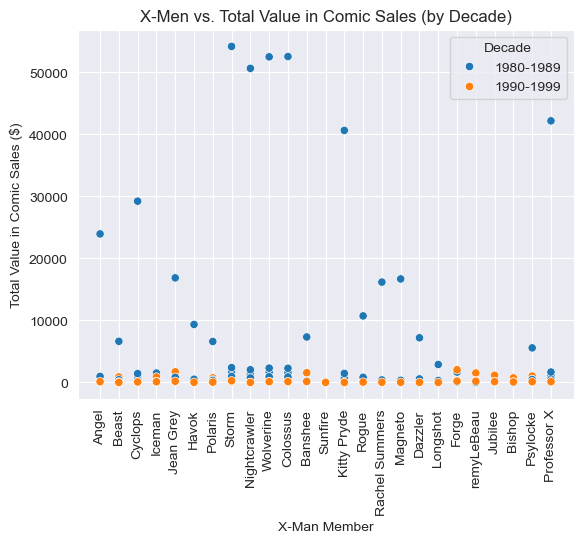

In [539]:
sns.scatterplot(x=mutant_df_melted['MemberXman'], 
                y = mutant_df_melted['TotalValue'],
                hue=mutant_df_melted['Decade'])#initializes the scatterplot that will show relationship between X-man, value and decade
sns.set_style(style="darkgrid")#sets the style for the graph 
plt.xticks(rotation=90)#rotates x axis ticks so they are legable 
plt.xlabel(xlabel="X-Man Member")# chainging the x and y labels so they fit with a presentation
plt.ylabel(ylabel="Total Value in Comic Sales ($)")
plt.title(label="X-Men vs. Total Value in Comic Sales (by Decade)")#titling the graph
plt.show #showing the plot 

##### Interpretation: The values for each hero are basically concentrated towards lower prices (0-500), but there are a notable number of exceptions. These exceptions tend to come from the more popular X-men: Storm, Wolverine, Colossus, Nighcrawler and Professor X. This should not be surprising, given that more popular heroes tend to be more valued  by consumers. 
##### The decade hue tells us that, in general, values tended to decrease as time passed. We can potentially attribute this to increased interest in comic books, and vintage items typically having more value than current ones, especially for collectors that would probably buy from these sellers . 

<function matplotlib.pyplot.show(close=None, block=None)>

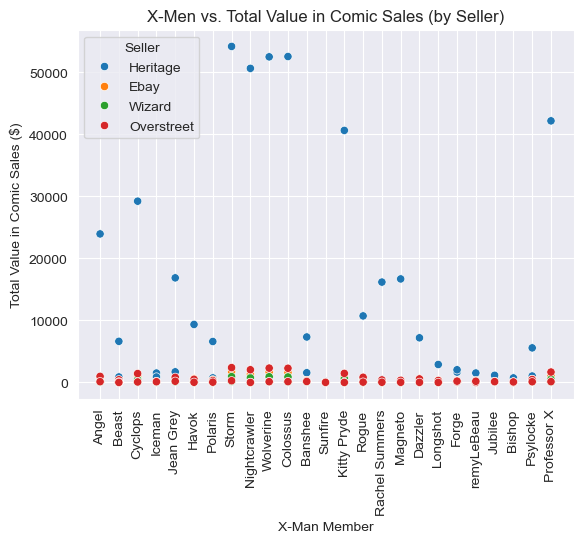

In [540]:
sns.scatterplot(x=mutant_df_melted['MemberXman'], 
                y = mutant_df_melted['TotalValue'],
                hue=mutant_df_melted['Seller'])#different hue variable to show differnet relationship
sns.set_style(style="darkgrid")
plt.xticks(rotation=90)
plt.xlabel(xlabel="X-Man Member")
plt.ylabel(ylabel="Total Value in Comic Sales ($)")
plt.title(label="X-Men vs. Total Value in Comic Sales (by Seller)")#titling the graph
plt.show

##### Interpretation: The most apparetn pattern here is that Heritage tends to have all of the outlier values. In fact, they are the only seller that has values over 2,000 (roughly). They are magnitudes more valuable than the other sellers. This could perhaps indicate that Heritage is overvalueing their books, or they alone have extremely rare comics whose values far surpass the other sellers. 